<a href="https://colab.research.google.com/github/albertodiez1980LaRioja/Prueba/blob/master/Entregable1_cuaderno2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# En este notebook visualizaremos el dataset para ver
# si se relacionan las variables unas entre otras
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
traindf = pd.read_csv("train.csv")
testdf = pd.read_csv("test.csv")
# separamos los descriptores de clases
traindata = traindf.values
descriptores,clases = traindata[:,0:-1],traindata[:,-1]

traindf.head()

SL      EEG  BP   HR  CIRCULATION  ACTIVITY
0   4019.64 -1600.00  13   79          317         3
1   2191.03 -1146.08  20   54          165         2
2   2787.99 -1263.38  46   67          224         2
3   9545.98 -2848.93  26  138          554         4
4  14148.80 -2381.15  85  120          809         4

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

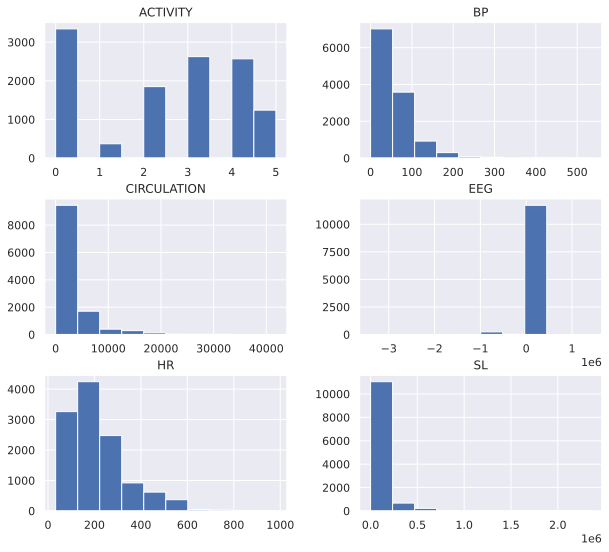

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# La siguiente línea se utiliza para generar los gráficos en formato SVG los cuales son más legibles. 
%config InlineBackend.figure_format = 'svg'

# mostramos los graficos de las variables, en ellos podemos ver que no todas las 
# clases tienen la misma representacion, y que las distribuciones del resto de
# descriptores estan muy poco repartidas
features = ['SL', 'EEG','BP','HR','CIRCULATION','ACTIVITY']
traindf[features].hist(figsize=(10, 9));

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

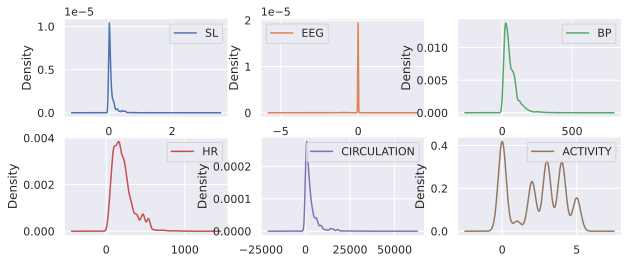

In [10]:
# aqui podemos ver lo mismo que en la grafica anterior
traindf[features].plot(kind='density', subplots=True, layout=(2, 3), 
                  sharex=False, figsize=(10, 4));

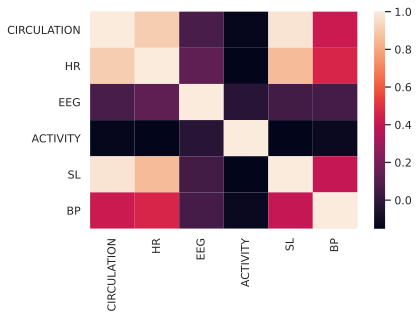

In [14]:
# ahora comprobamos si hay variables correlacionadas unas con otras, este es un
# paso muy importante:
numerical = list(set(traindf.columns) )

corr_matrix = traindf[numerical].corr()
sns.heatmap(corr_matrix);
# podemos ver que ACTIVITY no esta relacionado directamente con ninguna,
# pero que CIRCULATION esta muy relacionada con HR y SL, y estas entre si
# podriamos dejar una de estas tres solamente


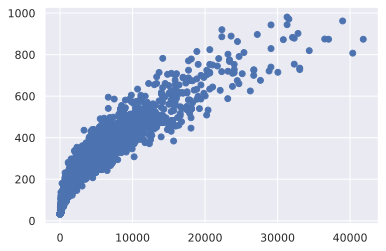

In [21]:
# haciendo diagramas de dispersion:
plt.scatter(traindf['CIRCULATION'], traindf['HR']); 
# se puede ver que estan muy correlados, pero no de forma lineal


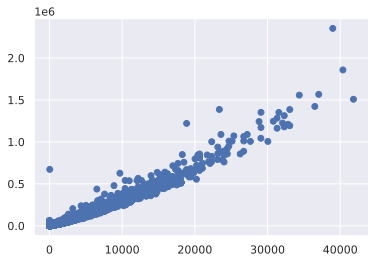

In [19]:
plt.scatter(traindf['CIRCULATION'], traindf['SL']);
# se puede ver que estan correlados de forma lineal
# son los mas correlacionados, asi que uno se podria quitar

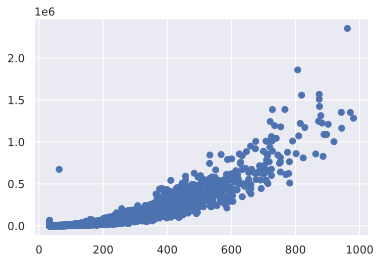

In [23]:
plt.scatter(traindf['HR'], traindf['SL']);

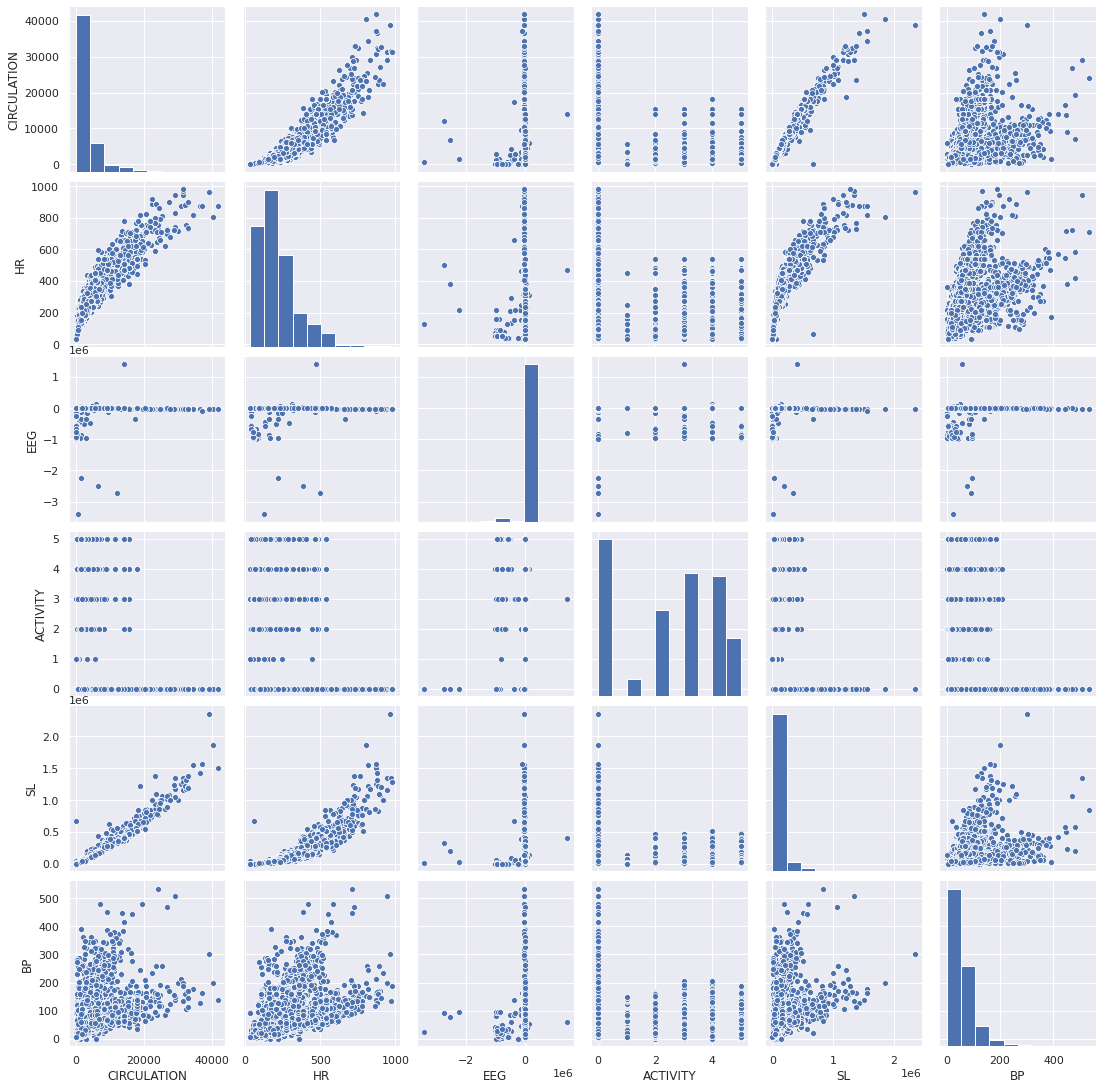

In [27]:
# Cambiamos la configuración a png ya que la generación de diagramas con SVG puede ser muy lenta en este caso
%config InlineBackend.figure_format = 'png'
sns.pairplot(traindf[numerical]);
# sencillamente vemos lo mismo que antes con un poco mas de informacion
# podemos ver la pequeña correlacion entre activity y egg, para un par de clases

In [29]:
%config InlineBackend.figure_format = 'svg'
traindf.describe(include='all')
# podemos var que todos los descriptores tienen valor

SL           EEG  ...   CIRCULATION      ACTIVITY
count  1.199900e+04  1.199900e+04  ...  11999.000000  11999.000000
mean   7.566022e+04 -2.229112e+04  ...   2900.695058      2.368947
std    1.266692e+05  1.284765e+05  ...   3789.822123      1.736608
min    4.222420e+01 -3.396800e+06  ...      5.000000      0.000000
25%    1.006220e+04 -5.889500e+03  ...    587.000000      0.000000
50%    3.243530e+04 -3.498580e+03  ...   1626.000000      3.000000
75%    8.156320e+04 -2.290000e+03  ...   3539.000000      4.000000
max    2.352450e+06  1.410000e+06  ...  41819.000000      5.000000

[8 rows x 6 columns]

In [0]:
# Como lo que nos interesa es ACTIVITY solo solo esta ligeramente relacionado con un
# descriptor no hay mucho mas por hacer, hay que recordar que se pueden quitar dos
# descriptores por que hay tres que estan bastante correlacionados, dos de ellos mucho